# Chi square ($\chi^2$) test
Use to test independence between categorical variables.
<br>
Named for the greek letter $\chi$.
<br>
Make use of the contingency table to summarize the relationship between categorical variables. It contains the frequency of the observation to their corresponding row and column categories.
<br><br>
$H_0$: There is no relationship between the variables.
<br>
$H_A$: There is a significant relation between the variables.
<br><br>
Decision making:
<br>
If $\chi^2$ stat $\geq$ critical value, reject $H_0$ (the variables are dependent)
<br>
If $\chi^2$ stat $<$ critical value, do not reject $H_0$ (the variables are independent)
<br><br>
If p-value $\leq$ $\alpha$, reject $H_0$ (the variables are dependent)
<br>
If p-value $>$ $\alpha$, do not reject $H_0$ (the variables are independent)



## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## Import the dataset (esophageal cancer)

Source: Breslow, N. E. and Day, N. E. (1980) Statistical Methods in Cancer Research. Volume 1: The Analysis of Case-Control Studies. IARC Lyon / Oxford University Press.

In [2]:
esop = pd.read_csv('esophageal_cancer.csv')
esop

,Age_Group,Alcohol_Grams_Per_Day,Tobacco_Grams_Per_Day,ncases,ncontrols
0,25-34,0-39,0-9,0,40
1,25-34,0-39,10-19,0,10
2,25-34,0-39,20-29,0,6
3,25-34,0-39,30+,0,5
4,25-34,40-79,0-9,0,27
...,...,...,...,...,...
83,75+,40-79,30+,1,1
84,75+,80-119,0-9,1,1
85,75+,80-119,10-19,1,1
86,75+,120+,0-9,2,2


## Convert the columns of age, alcohol, tobacco to categories
> Age column
<br>
* Millennial1: 25-34 years old
* Millennial2: 35-44 years old
* GenX: 45-54 years old
* Boomer1: 55-64 years old
* Boomer2: 65-74 years old
* Traditionalists: 75+ years old

> Alcohol column
<br>
* Low 0-39 grams per day
* Moderate 40-79 grams per day
* High 80-119 grams per day
* Very High 120+ grams per day

> Tobacco column
<br>
* Low 0-9 grams per day
* Moderate 10-19 grams per day
* High 20-29 grams per day
* Very High 30+ grams per day


In [3]:
esop['Age_Group'] = esop['Age_Group'].apply(str)
esop['Alcohol_Grams_Per_Day'] = esop['Alcohol_Grams_Per_Day'].apply(str)
esop['Tobacco_Grams_Per_Day'] = esop['Tobacco_Grams_Per_Day'].apply(str)

## Change the names of the columns

In [4]:
esop = esop.rename(columns = {'Age_Group':'Age', 
                              'Alcohol_Grams_Per_Day':'Alcohol', 
                              'Tobacco_Grams_Per_Day':'Tobacco'})
esop

,Age,Alcohol,Tobacco,ncases,ncontrols
0,25-34,0-39,0-9,0,40
1,25-34,0-39,10-19,0,10
2,25-34,0-39,20-29,0,6
3,25-34,0-39,30+,0,5
4,25-34,40-79,0-9,0,27
...,...,...,...,...,...
83,75+,40-79,30+,1,1
84,75+,80-119,0-9,1,1
85,75+,80-119,10-19,1,1
86,75+,120+,0-9,2,2


## Convert the values in age column to names

In [5]:
esop.replace('25-34', 'Millennial1', inplace=True)
esop.replace('35-44', 'Millennial2', inplace=True)
esop.replace('45-54', 'GenX', inplace=True)
esop.replace('55-64', 'Boomer1', inplace=True)
esop.replace('65-74', 'Boomer2', inplace=True)
esop.replace('75+', 'Traditionalists', inplace=True)
esop

,Age,Alcohol,Tobacco,ncases,ncontrols
0,Millennial1,0-39,0-9,0,40
1,Millennial1,0-39,10-19,0,10
2,Millennial1,0-39,20-29,0,6
3,Millennial1,0-39,30+,0,5
4,Millennial1,40-79,0-9,0,27
...,...,...,...,...,...
83,Traditionalists,40-79,30+,1,1
84,Traditionalists,80-119,0-9,1,1
85,Traditionalists,80-119,10-19,1,1
86,Traditionalists,120+,0-9,2,2


## Convert the values in alcohol column to categories

In [6]:
esop.replace('0-39', 'LowAlc', inplace=True)
esop.replace('40-79', 'ModAlc', inplace=True)
esop.replace('80-119', 'HighAlc', inplace=True)
esop.replace('120+', 'VeryHighAlc', inplace=True)
esop

,Age,Alcohol,Tobacco,ncases,ncontrols
0,Millennial1,LowAlc,0-9,0,40
1,Millennial1,LowAlc,10-19,0,10
2,Millennial1,LowAlc,20-29,0,6
3,Millennial1,LowAlc,30+,0,5
4,Millennial1,ModAlc,0-9,0,27
...,...,...,...,...,...
83,Traditionalists,ModAlc,30+,1,1
84,Traditionalists,HighAlc,0-9,1,1
85,Traditionalists,HighAlc,10-19,1,1
86,Traditionalists,VeryHighAlc,0-9,2,2


## Convert the values in tobacco column to categories

In [7]:
esop.replace('0-9', 'LowTbco', inplace=True)
esop.replace('10-19', 'ModTbco', inplace=True)
esop.replace('20-29', 'HighTbco', inplace=True)
esop.replace('30+', 'VeryHighTbco', inplace=True)
esop

,Age,Alcohol,Tobacco,ncases,ncontrols
0,Millennial1,LowAlc,LowTbco,0,40
1,Millennial1,LowAlc,ModTbco,0,10
2,Millennial1,LowAlc,HighTbco,0,6
3,Millennial1,LowAlc,VeryHighTbco,0,5
4,Millennial1,ModAlc,LowTbco,0,27
...,...,...,...,...,...
83,Traditionalists,ModAlc,VeryHighTbco,1,1
84,Traditionalists,HighAlc,LowTbco,1,1
85,Traditionalists,HighAlc,ModTbco,1,1
86,Traditionalists,VeryHighAlc,LowTbco,2,2


## How many people developed esophageal cancer from each age group?

In [8]:
Mil01 = esop[esop['Age'] == 'Millennial1']
Mil01 = Mil01['ncases'].sum()

Mil02 = esop[esop['Age'] == 'Millennial2']
Mil02 = Mil02['ncases'].sum()

GenX = esop[esop['Age'] == 'GenX']
GenX = GenX['ncases'].sum()

Bmr01 = esop[esop['Age'] == 'Boomer1']
Bmr01 = Bmr01['ncases'].sum()

Bmr02 = esop[esop['Age'] == 'Boomer2']
Bmr02 = Bmr02['ncases'].sum()

Trad = esop[esop['Age'] == 'Traditionalists']
Trad = Trad['ncases'].sum()

Agegrp = {'Age Group': ['Millennial1', 'Millennial2', 'GenX', 'Boomer1', 'Boomer2', 'Traditionalists'], 
          'Frequency': [Mil01, Mil02, GenX, Bmr01, Bmr02, Trad]}
Agegrp = pd.DataFrame(data=Agegrp)
Agegrp

,Age Group,Frequency
0,Millennial1,1
1,Millennial2,9
2,GenX,46
3,Boomer1,76
4,Boomer2,55
5,Traditionalists,13


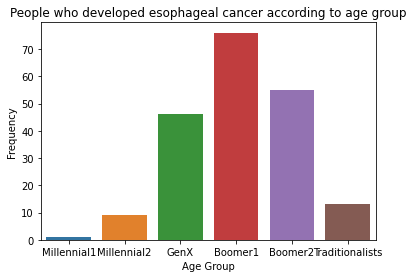

In [9]:
sns.barplot(x='Age Group', y='Frequency', 
            data=Agegrp).set_title('People who developed esophageal cancer according to age group')

plt.show()

## How many people did not developed esophageal cancer from each age group?

In [10]:
Mil01con = esop[esop['Age'] == 'Millennial1']
Mil01con = Mil01con['ncontrols'].sum()

Mil02con = esop[esop['Age'] == 'Millennial2']
Mil02con = Mil02con['ncontrols'].sum()

GenXcon = esop[esop['Age'] == 'GenX']
GenXcon = GenXcon['ncontrols'].sum()

Bmr01con = esop[esop['Age'] == 'Boomer1']
Bmr01con = Bmr01con['ncontrols'].sum()

Bmr02con = esop[esop['Age'] == 'Boomer2']
Bmr02con = Bmr02con['ncontrols'].sum()

Tradcon = esop[esop['Age'] == 'Traditionalists']
Tradcon = Tradcon['ncontrols'].sum()

Agegrpcon = {'Age Group': ['Millennial1', 'Millennial2', 'GenX', 'Boomer1', 'Boomer2', 'Traditionalists'], 
          'Frequency': [Mil01con, Mil02con, GenXcon, Bmr01con, Bmr02con, Tradcon]}
Agegrpcon = pd.DataFrame(data=Agegrpcon)
Agegrpcon

,Age Group,Frequency
0,Millennial1,116
1,Millennial2,199
2,GenX,213
3,Boomer1,242
4,Boomer2,161
5,Traditionalists,44


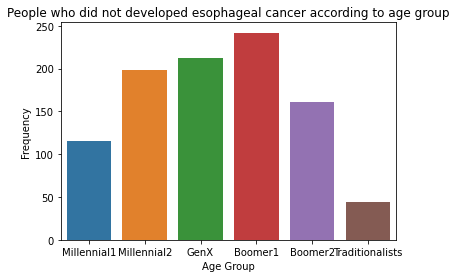

In [11]:
sns.barplot(x='Age Group', y='Frequency', 
            data=Agegrpcon).set_title('People who did not developed esophageal cancer according to age group')

plt.show()

## How many people developed esophageal cancer based on the amount of the alcohol they consumed?

In [12]:
LowAlc = esop[esop['Alcohol'] == 'LowAlc']
LowAlc = LowAlc['ncases'].sum()

ModAlc = esop[esop['Alcohol'] == 'ModAlc']
ModAlc = ModAlc['ncases'].sum()

HighAlc = esop[esop['Alcohol'] == 'HighAlc']
HighAlc = HighAlc['ncases'].sum()

VeryHighAlc = esop[esop['Alcohol'] == 'VeryHighAlc']
VeryHighAlc = VeryHighAlc['ncases'].sum()

AlcLvl = {'Grams per day': ['0-39', '40-79', '80-119', '120+'], 
          'Frequency': [LowAlc, ModAlc, HighAlc, VeryHighAlc]}
AlcLvl = pd.DataFrame(data=AlcLvl)
AlcLvl

,Grams per day,Frequency
0,0-39,29
1,40-79,75
2,80-119,51
3,120+,45


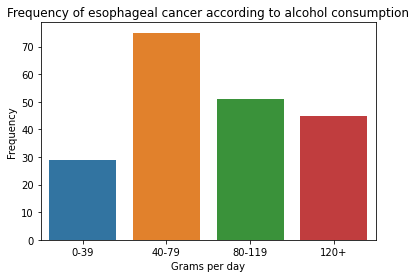

In [13]:
sns.barplot(x='Grams per day', y='Frequency', 
            data=AlcLvl).set_title('Frequency of esophageal cancer according to alcohol consumption')

plt.show()

## How many people did not developed esophageal cancer based on the amount of the alcohol they consumed?

In [14]:
LowAlcCon = esop[esop['Alcohol'] == 'LowAlc']
LowAlcCon = LowAlcCon['ncontrols'].sum()

ModAlcCon = esop[esop['Alcohol'] == 'ModAlc']
ModAlcCon = ModAlcCon['ncontrols'].sum()

HighAlcCon = esop[esop['Alcohol'] == 'HighAlc']
HighAlcCon = HighAlcCon['ncontrols'].sum()

VeryHighAlcCon = esop[esop['Alcohol'] == 'VeryHighAlc']
VeryHighAlcCon = VeryHighAlcCon['ncontrols'].sum()

AlcLvlCon = {'Grams per day': ['0-39', '40-79', '80-119', '120+'], 
          'Frequency': [LowAlcCon, ModAlcCon, HighAlcCon, VeryHighAlcCon]}
AlcLvlCon = pd.DataFrame(data=AlcLvlCon)
AlcLvlCon

,Grams per day,Frequency
0,0-39,415
1,40-79,355
2,80-119,138
3,120+,67


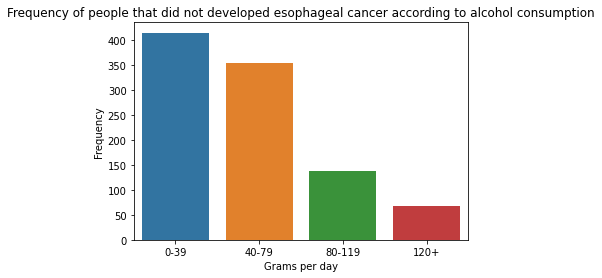

In [15]:
sns.barplot(x='Grams per day', y='Frequency', 
            data=AlcLvlCon).set_title('Frequency of people that did not developed esophageal cancer according to alcohol consumption')

plt.show()

## How many people developed esophageal cancer based on the amount of the tobacco they smoked?

In [16]:
LowTbco = esop[esop['Tobacco'] == 'LowTbco']
LowTbco = LowTbco['ncases'].sum()

ModTbco = esop[esop['Tobacco'] == 'ModTbco']
ModTbco = ModTbco['ncases'].sum()

HighTbco = esop[esop['Tobacco'] == 'HighTbco']
HighTbco = HighTbco['ncases'].sum()

VeryHighTbco = esop[esop['Tobacco'] == 'VeryHighTbco']
VeryHighTbco = VeryHighTbco['ncases'].sum()

TbcoLvl = {'Grams per day': ['0-9', '10-19', '20-29', '30+'], 
          'Frequency': [LowTbco, ModTbco, HighTbco, VeryHighTbco]}
TbcoLvl = pd.DataFrame(data=TbcoLvl)
TbcoLvl

,Grams per day,Frequency
0,0-9,78
1,10-19,58
2,20-29,33
3,30+,31


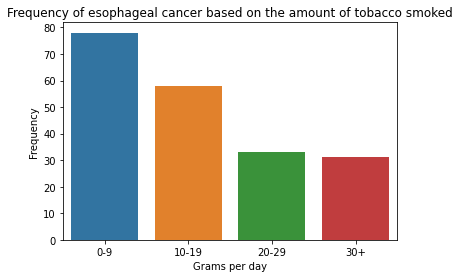

In [17]:
sns.barplot(x='Grams per day', y='Frequency', 
            data=TbcoLvl).set_title('Frequency of esophageal cancer based on the amount of tobacco smoked')

plt.show()

## How many people did not developed esophageal cancer based on the amount of the tobacco they smoked?

In [18]:
LowTbcoCon = esop[esop['Tobacco'] == 'LowTbco']
LowTbcoCon = LowTbcoCon['ncontrols'].sum()

ModTbcoCon = esop[esop['Tobacco'] == 'ModTbco']
ModTbcoCon = ModTbcoCon['ncontrols'].sum()

HighTbcoCon = esop[esop['Tobacco'] == 'HighTbco']
HighTbcoCon = HighTbcoCon['ncontrols'].sum()

VeryHighTbcoCon = esop[esop['Tobacco'] == 'VeryHighTbco']
VeryHighTbcoCon = VeryHighTbcoCon['ncontrols'].sum()

TbcoLvlCon = {'Grams per day': ['0-9', '10-19', '20-29', '30+'], 
          'Frequency': [LowTbcoCon, ModTbcoCon, HighTbcoCon, VeryHighTbcoCon]}
TbcoLvlCon = pd.DataFrame(data=TbcoLvlCon)
TbcoLvlCon

,Grams per day,Frequency
0,0-9,525
1,10-19,236
2,20-29,132
3,30+,82


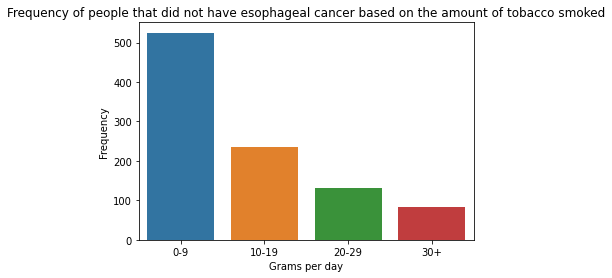

In [19]:
sns.barplot(x='Grams per day', y='Frequency', 
            data=TbcoLvlCon).set_title('Frequency of people that did not have esophageal cancer based on the amount of tobacco smoked')

plt.show()

# Perform $\chi^2$ test

## Is being an elderly ($\geq$ 65 years old) have a relationship with developing esophageal cancer?
$H_0$: There is no relation between cancer development and being an elderly.
<br>
$H_A$: There is a significant relation between cancer development and being an elderly.
<br>
Significance level: $\alpha = 0.05$
<br>
This is a simple version with 2 categorical variables. We assign the term "elderly" to the age group 65 years old and above for ease.

In [20]:
# Create a 2x2 contingency table

CancerElder = Bmr02 + Trad
NoCancerElder = Bmr02con + Tradcon

CancerNonElder = Mil01 + Mil02 + GenX + Bmr01
NoCancerNonElder = Mil01con + Mil02con + GenXcon + Bmr01con

Elderly = pd.DataFrame({'Cancer': [CancerElder, CancerNonElder], 
                        'No Cancer': [NoCancerElder, NoCancerNonElder]}, 
                       index=['Elderly', 'Not Elderly'])
Elderly

,Cancer,No Cancer
Elderly,68,205
Not Elderly,132,770


In [21]:
# Perform the chi square test

chi2stat, pval, dof, expected = chi2_contingency(Elderly)
chi2stat, pval, dof, expected

(14.944019834527573,
 0.00011074852785538197,
 1,
 array([[ 46.46808511, 226.53191489],
        [153.53191489, 748.46808511]]))

In [22]:
# Determine the critical value (using 95% probability)

prob = 0.95

CrVal = chi2.ppf(prob, dof)
CrVal

3.841458820694124

## Result and Interpretation
We go back to our initial question, is being an elderly ($\geq$ 65 years old) have a relationship with developing cancer?
<br><br>
p-value = 0.0001 $<$ $\alpha = 0.05$
<br>
$\chi^2$ stat = 14.94 $>$ Critical Value = 3.84
<br><br>
We will reject our null hypothesis. Based on the data that we have, and the test that we did, we can say that being an elderly have a relationship in developing esophageal cancer.
<br><br>
Hold on... Doesn't that makes us bias towards the elderly? How about we try to find out the relationship across all age groups.

## Does age and development of cancer have a relationship?
$H_0$: There is no relation between cancer development and age.
<br>
$H_A$: There is a significant relation between cancer development and age.
<br>
Significance level: $\alpha = 0.05$



In [23]:
# Create the contingency table
AgeChi = pd.DataFrame({'Cancer': [Mil01, Mil02, GenX, Bmr01, Bmr02, Trad], 
                       'No Cancer': [Mil01con, Mil02con, GenXcon, Bmr01con, Bmr02con, Tradcon]}, 
                       index=['Millennial 1', 'Millennial 2', 'Gen X', 'Boomer 1', 'Boomer 2', 'Traditionalists'])
AgeChi

,Cancer,No Cancer
Millennial 1,1,116
Millennial 2,9,199
Gen X,46,213
Boomer 1,76,242
Boomer 2,55,161
Traditionalists,13,44


In [24]:
# Peform the chi square test

chi2stat, pval, dof, expected = chi2_contingency(AgeChi)
chi2stat, pval, dof, expected

(68.38246235828764,
 2.2237336009544736e-13,
 5,
 array([[ 19.91489362,  97.08510638],
        [ 35.40425532, 172.59574468],
        [ 44.08510638, 214.91489362],
        [ 54.12765957, 263.87234043],
        [ 36.76595745, 179.23404255],
        [  9.70212766,  47.29787234]]))

In [25]:
# Determine the critical value (using 95% probability)

prob = 0.95

CrVal = chi2.ppf(prob, dof)
CrVal

11.070497693516351

## Result and Interpretation
p-value = 2.2e-13 $<$ $\alpha = 0.05$
<br>
$\chi^2$ stat = 68.38 $>$ Critical Value = 11.07
<br><br>
We will reject our null hypothesis. Based on the data that we have, and the test that we did, we can say that development of cancer is dependent on age.

## Does the amount of alcohol consumed have an influence in the development of esophageal cancer?
$H_0$: There is no relation between cancer development and alcohol consumption.
<br>
$H_A$: There is a significant relation between cancer development and alcohol consumption.
<br>
Significance level: $\alpha = 0.05$

In [26]:
# Create the contingency table
AlcoholChi = pd.DataFrame({'Cancer': [LowAlc, ModAlc, HighAlc, VeryHighAlc], 
                           'No Cancer': [LowAlcCon, ModAlcCon, HighAlcCon, VeryHighAlcCon]}, 
                          index=['Low', 'Moderate', 'High', 'Very High'])
AlcoholChi

,Cancer,No Cancer
Low,29,415
Moderate,75,355
High,51,138
Very High,45,67


In [27]:
# Peform the chi square test

chi2stat, pval, dof, expected = chi2_contingency(AlcoholChi)
chi2stat, pval, dof, expected

(90.45039515261173,
 1.7531368104697901e-19,
 3,
 array([[ 75.57446809, 368.42553191],
        [ 73.19148936, 356.80851064],
        [ 32.17021277, 156.82978723],
        [ 19.06382979,  92.93617021]]))

In [28]:
# Determine the critical value (using 95% probability)

prob = 0.95

CrVal = chi2.ppf(prob, dof)
CrVal

7.814727903251179

## Result and Interpretation
p-value = 1.75e-19 $<$ $\alpha = 0.05$
<br>
$\chi^2$ stat = 90.45 $>$ Critical Value = 7.8
<br><br>
We will reject our null hypothesis. Based on the data that we have, and the test that we did, we can say that development of cancer is influenced by alcohol consumption.

## How high is too high?
What is the threshold of alcohol consumption where it will have an influence in the development of cancer?

In [29]:
# Create a 2x2 contingency table where the low alcohol level is the reference.

ThreshAlc = ModAlc + HighAlc+ VeryHighAlc
ThreshAlcCon = ModAlcCon + HighAlcCon + VeryHighAlcCon

AlcoholChi2 = pd.DataFrame({'Cancer': [LowAlc, ThreshAlc], 
                           'No Cancer': [LowAlcCon, ThreshAlcCon]}, 
                          index=['Low', 'Threshold'])
AlcoholChi2

,Cancer,No Cancer
Low,29,415
Threshold,171,560


In [30]:
# Peform the chi square test

chi2stat, pval, dof, expected = chi2_contingency(AlcoholChi2)
chi2stat, pval, dof, expected

(54.41257786530743,
 1.6251930746868895e-13,
 1,
 array([[ 75.57446809, 368.42553191],
        [124.42553191, 606.57446809]]))

In [31]:
# Determine the critical value (using 95% probability)

prob = 0.95

CrVal = chi2.ppf(prob, dof)
CrVal

3.841458820694124

## Result and Interpretation
p-value = 1.625e-13 $<$ $\alpha = 0.05$
<br>
$\chi^2$ stat = 54.41 $>$ Critical Value = 3.84
<br><br>
Apparently, base on the chi square test that we've done, alcohol consumption as low as 0-39 grams per day can influence the development of esophageal cancer.

## Does the amount of tobacco smoked have an influence in the development of esophageal cancer?
$H_0$: There is no relation between cancer development and tobacco smoked.
<br>
$H_A$: There is a significant relation between cancer development and tobacco smoked.
<br>
Significance level: $\alpha = 0.05$

In [32]:
# Create the contingency table
TobaccoChi = pd.DataFrame({'Cancer': [LowTbco, ModTbco, HighTbco, VeryHighTbco], 
                           'No Cancer': [LowTbcoCon, ModTbcoCon, HighTbcoCon, VeryHighTbcoCon]}, 
                          index=['Low', 'Moderate', 'High', 'Very High'])
TobaccoChi

,Cancer,No Cancer
Low,78,525
Moderate,58,236
High,33,132
Very High,31,82


In [33]:
# Peform the chi square test

chi2stat, pval, dof, expected = chi2_contingency(TobaccoChi)
chi2stat, pval, dof, expected

(18.363025446437717,
 0.00037016686953983055,
 3,
 array([[102.63829787, 500.36170213],
        [ 50.04255319, 243.95744681],
        [ 28.08510638, 136.91489362],
        [ 19.23404255,  93.76595745]]))

In [34]:
# Determine the critical value (using 95% probability)

prob = 0.95

CrVal = chi2.ppf(prob, dof)
CrVal

7.814727903251179

## Result and Interpretation
p-value = 0.0003 $<$ $\alpha = 0.05$
<br>
$\chi^2$ stat = 18.36 $>$ Critical Value = 7.8
<br><br>
We will reject our null hypothesis. Based on the data that we have, and the test that we did, we can say that development of cancer is influenced by tobacco smoking.

## How many is too many?
What is the threshold of tobacco smoking where it will have an influence in the development of cancer?

In [35]:
# Create a 2x2 contingency table where the low tobacco smoked is the reference.

ThreshTbco = ModTbco + HighTbco + VeryHighTbco
ThreshTbcoCon = ModTbcoCon + HighTbcoCon + VeryHighTbcoCon

TobaccoChi2 = pd.DataFrame({'Cancer': [LowTbco, ThreshTbco], 
                           'No Cancer': [LowTbcoCon, ThreshTbcoCon]}, 
                          index=['Low', 'Threshold'])
TobaccoChi2

,Cancer,No Cancer
Low,78,525
Threshold,122,450


In [36]:
# Peform the chi square test

chi2stat, pval, dof, expected = chi2_contingency(TobaccoChi2)
chi2stat, pval, dof, expected

(14.053319891840639,
 0.0001776998601699044,
 1,
 array([[102.63829787, 500.36170213],
        [ 97.36170213, 474.63829787]]))

In [37]:
# Determine the critical value (using 95% probability)

prob = 0.95

CrVal = chi2.ppf(prob, dof)
CrVal

3.841458820694124

## Result and Interpretation
p-value = 0.0001 $<$ $\alpha = 0.05$
<br>
$\chi^2$ stat = 14.05 $>$ Critical Value = 3.8
<br><br>
Based on the test we did, tobacco smoking as low as 0-9 grams per day has an influence in developing esophageal cancer.